In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data_prj.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [73]:
df['Дата'] = pd.to_datetime(df['Дата'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [75]:
grouped_df = (df.groupby('Дата', as_index=False).agg({'Количество': 'sum'})) 
# исправила с size на кол-во продаж

Вывести несколько первых строк сгруппированных данных

In [77]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

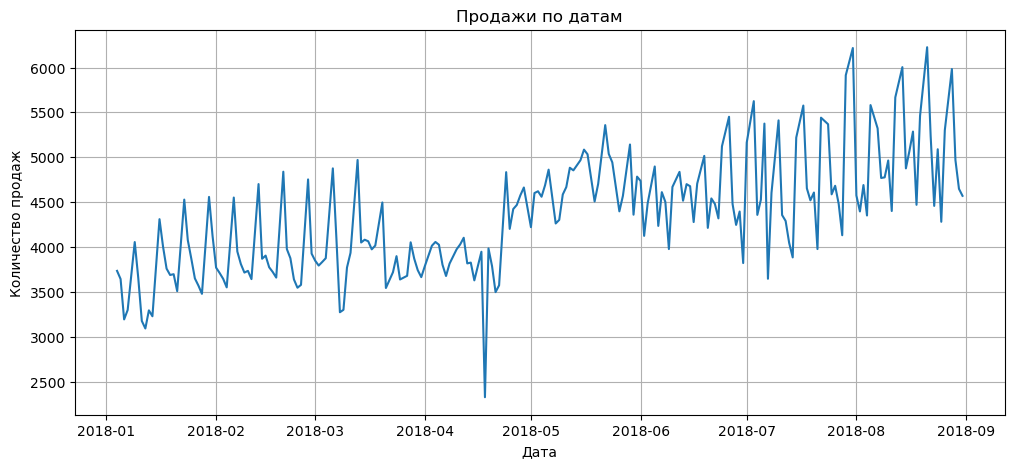

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.title('Продажи по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [25]:
#На графике представлена динамика продаж по дням, поэтому график не особо читабелен. 
#Наблюдается высокая волатильность показателя: значения значительно колеблются от дня к дню, формируя рваную, нестабильную динамику. 
#Явно выраженного устойчивого тренда роста или снижения не выявлено — продажи колеблются вокруг среднего уровня. 
#единственное, явный спад продаж в апреле месяце, где примерно во второй декаде идет резкое падение продаж ниже 2500, после продажи идут в рост
#Отдельные пиковые и минимальные значения могут быть связаны с операционными факторами, такими как неравномерность заказов,
#логистика или промо-активности.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [79]:
df.loc[df['Количество'].idxmax()]

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [81]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [83]:
# день недели (0 = понедельник, 1 = вторник, 2 = среда)
df['День_недели'] = df['Дата'].dt.weekday

# месяц
df['Месяц'] = df['Дата'].dt.month

In [85]:
#Фильтр: среда + летние месяцы + только склады 3 
summer_wed_df = df[(df['День_недели'] == 2) & (df['Месяц'].isin([6, 7, 8])) & (df['Склад'].isin([3]))]

# Группируем по месяцу, складу и товару, суммируем количество
grouped = (summer_wed_df.groupby(['Месяц', 'Склад', 'Номенклатура'], as_index=False).agg({'Количество': 'sum'}))

# Для каждого месяца и склада находим топовый товар
top_products = (grouped.sort_values(['Месяц', 'Склад', 'Количество'], ascending=[True, True, False]).groupby(['Месяц', 'Склад']).head(1)
    .reset_index(drop=True))

top_products

,Месяц,Склад,Номенклатура,Количество
0,6,3,product_1,616
1,7,3,product_1,696
2,8,3,product_1,955


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [87]:
temp_df = pd.read_csv('temp_astana2.csv', sep=',',encoding='ansi')

In [89]:
# 2. Преобразуем дату в datetime
temp_df['Дата'] = pd.to_datetime(temp_df['Дата'], dayfirst=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1432\1385677427.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  temp_df['Дата'] = pd.to_datetime(temp_df['Дата'], dayfirst=True)


In [91]:
temp_df.head()

,Дата,T
0,2018-08-31,8.2
1,2018-08-31,9.6
2,2018-08-31,11.3
3,2018-08-31,12.3
4,2018-08-31,13.2


In [93]:
temp_day_avg = temp_df.groupby('Дата', as_index=False)['T'].mean()

temp_day_avg


,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625
...,...,...
238,2018-08-27,12.5250
239,2018-08-28,14.1125
240,2018-08-29,13.8250
241,2018-08-30,14.1750


In [95]:
#  Объединяем с grouped_df по дате
merged_df = pd.merge(grouped_df, temp_day_avg, on='Дата', how='left')

In [97]:
merged_df['Месяц'] = merged_df['Дата'].dt.to_period('M') # добавляем колонку месяц, чтобы разгрузить график


In [99]:
monthly_df = (merged_df.groupby('Месяц', as_index=False).agg({'Количество': 'sum','T': 'mean'}))
monthly_df['Месяц'] = monthly_df['Месяц'].dt.to_timestamp()

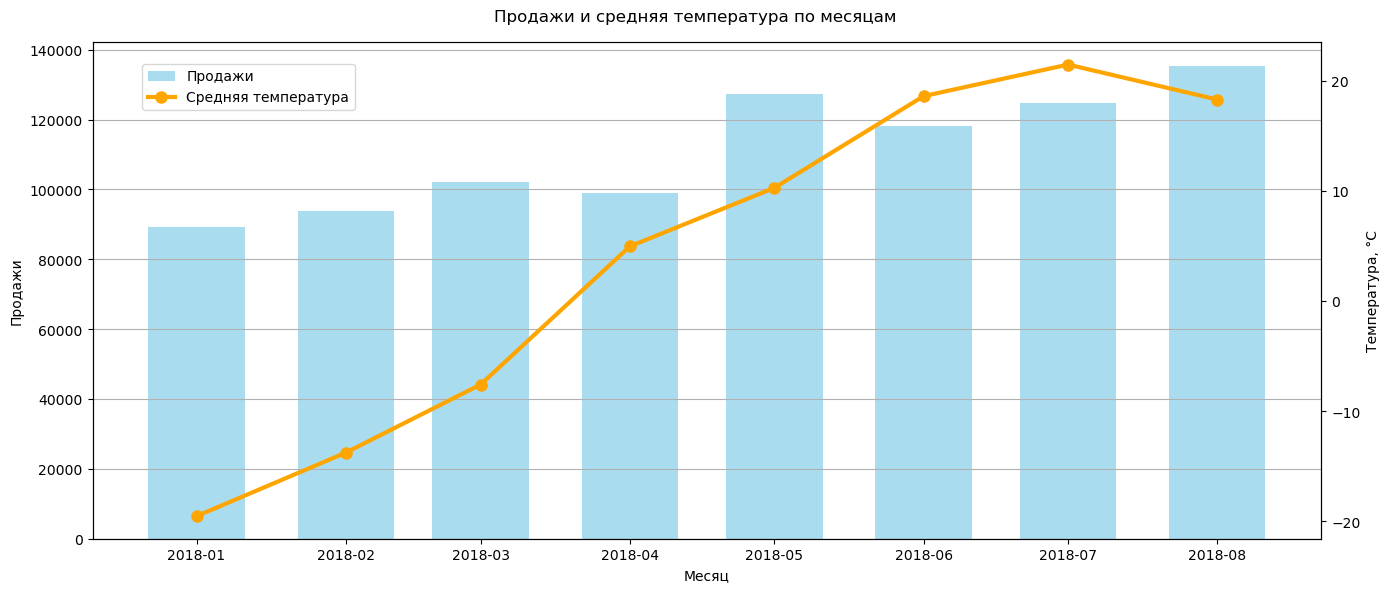

In [105]:
fig, ax1 = plt.subplots(figsize=(14,6))

# --- Продажи (столбцы) ---
ax1.bar(
    monthly_df['Месяц'],
    monthly_df['Количество'],
    alpha=0.7,
    color='skyblue',
    width=20,
    label='Продажи'
)
ax1.set_ylabel('Продажи')
ax1.set_xlabel('Месяц')
ax1.tick_params(axis='y')

# --- Температура (линия) ---
ax2 = ax1.twinx()
ax2.plot(
    monthly_df['Месяц'],
    monthly_df['T'],
    color='orange',
    marker='o',
    markersize=8,
    linewidth=3,
    label='Средняя температура'
)
ax2.set_ylabel('Температура, °C')
ax2.tick_params(axis='y')

# --- Настройки ---
fig.suptitle('Продажи и средняя температура по месяцам')
ax1.grid(True, axis='y')
plt.xticks(rotation=45)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


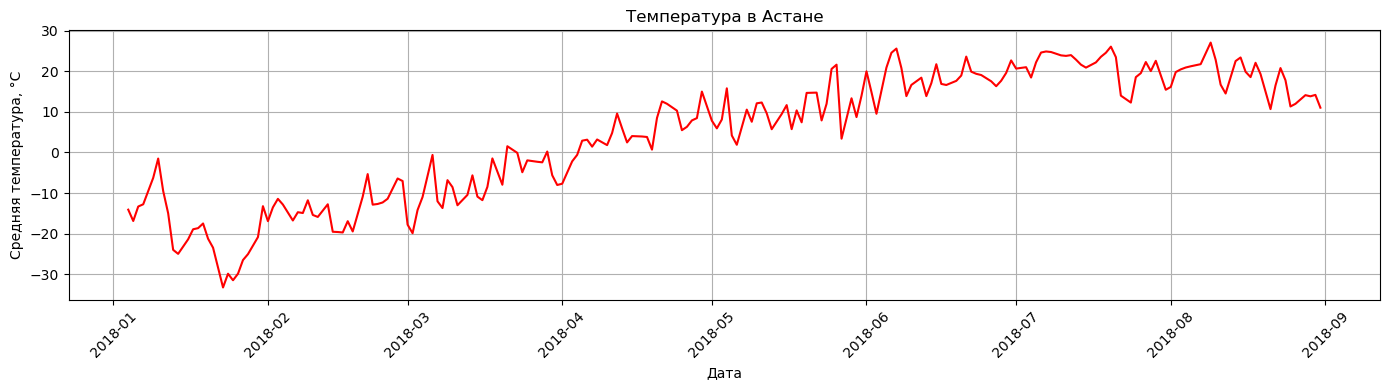

In [53]:
#  Отдельный график температуры
plt.figure(figsize=(14,4))
plt.plot(merged_df['Дата'], merged_df['T'], color='red')
plt.xlabel('Дата')
plt.ylabel('Средняя температура, °C')
plt.title('Температура в Астане')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()